In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import classifiers thay you want to use
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Import model tuning   methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import evaluate methods that you want to use
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc , roc_auc_score

In [2]:
# Read Data
train_df = pd.read_csv("Desktop/Launch_Angle_Training.csv")
#test_df = pd.read_csv("Desktop/Test_data.csv")


In [4]:
# Drop every row with NAN
train_clean = train_df.dropna()
print(train_clean.shape)
# Get statistics about the data(Optional)
#print(train_clean.describe())

(69914, 29)


In [18]:
# Prepare trainning dataset and target dataset
train_X = train_clean.drop('Outcome', axis = 1)
train_Y = train_clean['Outcome']
target = pd.factorize(train_clean['Outcome'])[0]

In [19]:
# Convert text data(object type) into dummy variables
train_convert = pd.get_dummies(data = train_X, columns=['pitch_type', 'stand', 'p_throws', 'bb_type'])

In [21]:
# Split dataset to train the model
X_train, X_test, y_train, y_test = train_test_split(train_convert, target, test_size = 0.2, random_state=42, stratify = train_Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55931, 46) (13983, 46) (55931,) (13983,)


In [22]:
# Create Random Forest object and Initialize Random Forest Classsifer
randomforest_model = RandomForestClassifier(n_estimators=1000)

In [9]:
# Compute 5-fold cross-validation to examine the model
cv_scores = cross_val_score(randomforest_model, train_convert, target, cv=5)
print(cv_scores)

C:\Users\Steven Ma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[ 0.95209495  0.95258867  0.95301437  0.95300765  0.95293276]


In [23]:
# Setup the hyperparameter grid
#param = dict(epochs=[10,20,30])

# Hyperparameter tuning - instantiate the RandomizedSearchCV object: randomforest_cv
#randomforest_cv = GridSearchCV(randomforest_model, param_grid = param, cv = 5, n_jobs=-1)

In [25]:
# Fit Training Data
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
# predict Output
y_predict = randomforest_model.predict(X_test)
print(y_predict)

[0 0 0 ..., 0 0 0]


In [27]:
# Get accuracy score
acc_score = accuracy_score(y_test, y_predict)
print("Accuracy Score:", acc_score)
# Get F1 score
f1 = f1_score(y_test, y_predict, average = 'weighted')
print("F1 Score:", f1)

Accuracy Score: 0.952799828363
F1 Score: 0.931226546314


C:\Users\Steven Ma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Create confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual Outcomes'], colnames=['Predicted Outcomes'])


Predicted Outcomes,0,2,4
Actual Outcomes,,,
0,13300,1,1
1,214,0,0
2,156,23,0
3,247,1,0
4,32,2,0
5,5,0,0
6,1,0,0


In [31]:
# predict probabilities(for ROC Curve)
prob = randomforest_model.predict_proba(X_test)

In [32]:
#Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1] , pos_label = 1)
aucc = auc(fpr, tpr)
aucc

0.90486484945526424

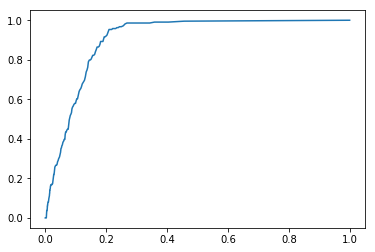

In [35]:
# Plot ROC
plt.plot(fpr,tpr)
plt.show()